In [26]:
import os
import pandas as pd
from src.training import run_training_pipeline, get_predictions

the dataset composed out of 50 songs
each song has an audio file and a lab file.

the lab file contains the chords and their start and stop time in the song.
the audio file is  mp3 format.


we split the dataset into 40 songs for training and 10 songs for testing

In [23]:
# train on 40 songs

songs = []
for file_name in os.listdir('lab_and_audio_files'):
    if(file_name.endswith('.mp3')):
        song_name = file_name[:-4]
        songs.append(song_name)

h_markov_model, ix_2_chord = run_training_pipeline(songs[:40])

training process:

1. read the lab file and the audio file and extract the chromagram with only the 12 chords of the westerndominant scale
3. we extract the mean note vector for each chord and the covariance matrix of the notes vectors
2. build the transition matrix - is a matrix (df) that describe the probability of a chord to transition to another chord based on the training set 
3. compute the initial state probabilities - the probability of the first chord in the song
4. build the gaussian hmm - the gaussian hmm is a model that describe the probability of a chord to transition to another chord based on the training set 
5. train the hmm - the hmm is trained using the training set


In [ ]:
# predict on 10

results = {}
for song in songs[-10:]:
    results[song] = get_predictions(h_markov_model, ix_2_chord, song)

we evaluate the model on the test set composed of 10 songs

In [31]:
from src.evaluation import evaluate_all_songs, plot_chord_transition_counts, plot_grouped_chord_timeline

def evaluate(results: dict[str, pd.DataFrame]):
    evaluate_all_songs(results)
    plot_chord_transition_counts(results)
    plot_grouped_chord_timeline(results["Twist_And_Shout"], "Twist_And_Shout")


🔹 **Chord Prediction Evaluation Across All Songs** 🔹

🎵 Lucy_In_The_Sky_With_Diamonds: Accuracy = 0.1821, F1-score = 0.2065
🎵 Twist_And_Shout: Accuracy = 0.3071, F1-score = 0.4152
🎵 Love_Me_Do: Accuracy = 0.2506, F1-score = 0.3123
🎵 Girl: Accuracy = 0.0168, F1-score = 0.0212
🎵 In_My_Life: Accuracy = 0.5025, F1-score = 0.5476
🎵 Eight_Days_a_Week: Accuracy = 0.2481, F1-score = 0.2918
🎵 Blue_Jay_Way: Accuracy = 0.4189, F1-score = 0.5487
🎵 The_Word: Accuracy = 0.1206, F1-score = 0.1609
🎵 Baby_You're_A_Rich_Man: Accuracy = 0.3574, F1-score = 0.4313
🎵 Octopus's_Garden: Accuracy = 0.0667, F1-score = 0.0789

🔹 **Overall Performance Across All Songs** 🔹
🎶 Overall Accuracy = 0.2547
🎶 Overall F1-score = 0.2960



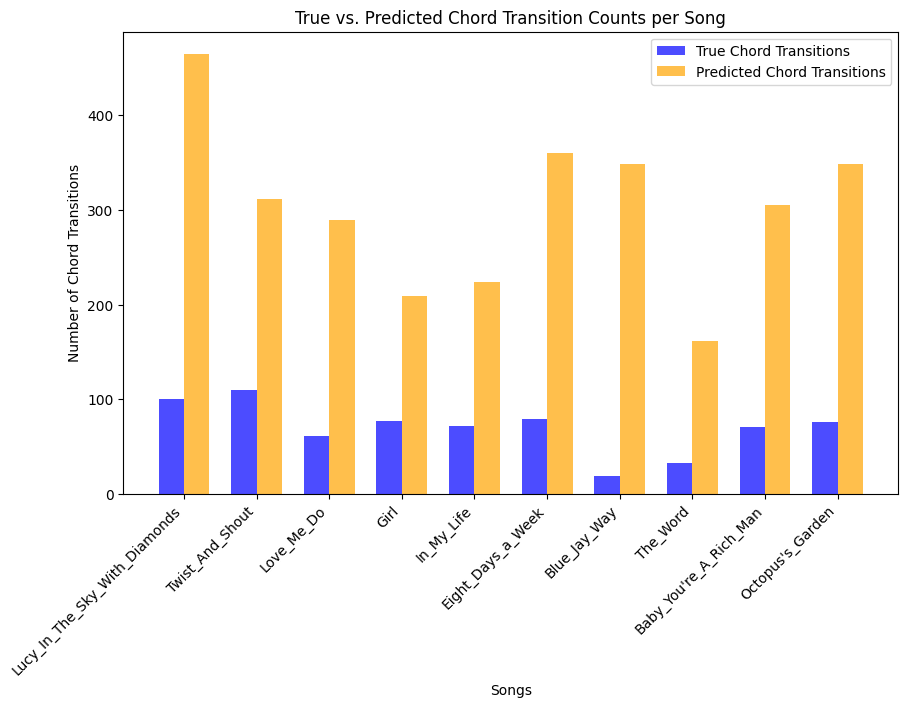

🔹 **Accuracy**: 0.3071
🔹 **F1-score**: 0.4152


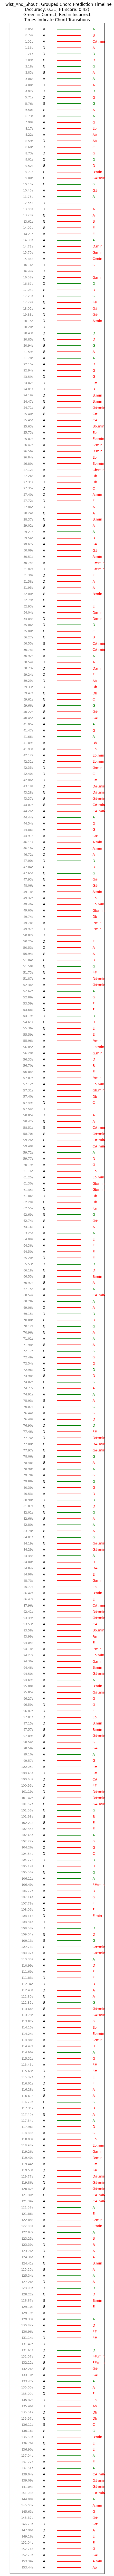

In [32]:
evaluate(results)